In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Давайте покодим на python. Нам потребуется библиотека SciPy.

In [2]:
import scipy.stats as stats
mu = 0.
sigma = 1.
X = stats.norm(mu, sigma)
x = X.rvs(3)
print(x)

[ 0.42828237 -0.59652421 -0.34678322]


Закодим разные распределения:

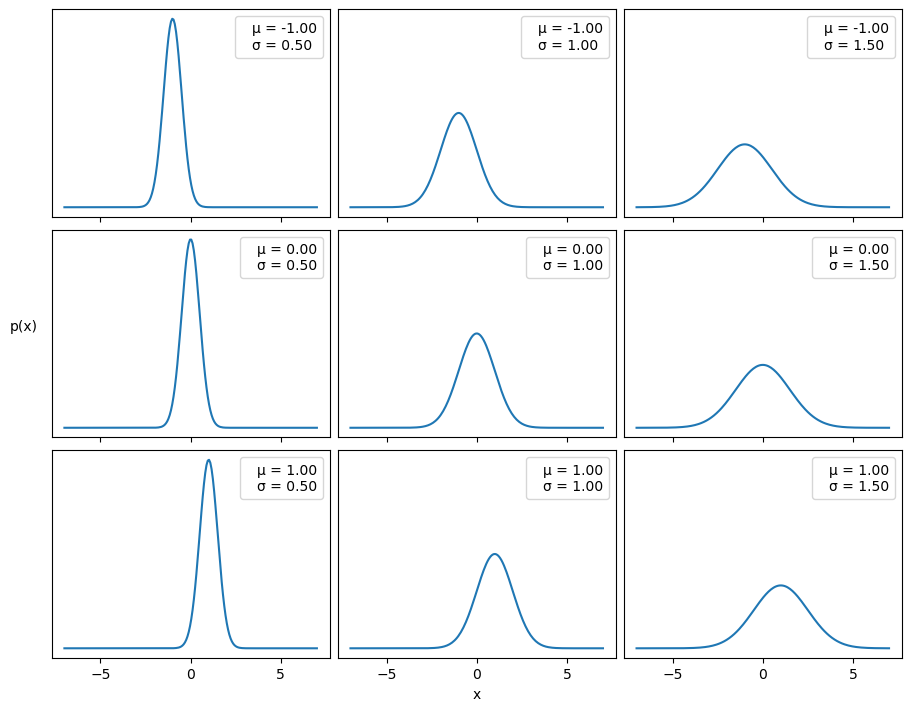

In [3]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), 
                     sharex=True, # убрать разметку на оси x
                     sharey=True, # убрать разметку на оси y
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x) # построим функцию плотности, привет Wolfram Mathematica
        ax[i,j].plot(x, y, label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd))
        ax[i,j].legend(loc=1, handlelength=0) # на заметку handlelength=0 не рисовать линию перед мю и сигмами
ax[2,1].set_xlabel('x');
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20);
ax[1,0].set_yticks([]);

In [4]:
# увы все нет так просто
import pandas as pd
temp = pd.read_table('data/maunaloa_c.dat',
                     header = 23, 
                     delim_whitespace=True,
                     names= ['Station code', 'Sample date', 'Weight', 'Flag',  'CO2'],
                     dtype={"Sample date": str}
                    )
display(temp.head(3))
display(temp.tail(3))

,Station code,Sample date,Weight,Flag,CO2
0,MLO,580329,4,0,316.1
1,MLO,580405,6,0,317.3
2,MLO,580412,4,0,317.6


,Station code,Sample date,Weight,Flag,CO2
2222,MLO,011215,7,0,371.2
2223,MLO,011222,6,0,371.3
2224,MLO,011229,6,0,371.5


In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station code  2225 non-null   object 
 1   Sample date   2225 non-null   object 
 2   Weight        2225 non-null   int64  
 3   Flag          2225 non-null   int64  
 4   CO2           2225 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 87.0+ KB


<b>Проблемы 2000 года:</b>   Функция Python может анализировать двухзначные годы, если задан код формата <code>%y</code>. Когда анализируются двухзначные годы, они конвертируются в соответствии со стандартами POSIX и ISO C: значения 69–99 отображаются на 1969–1999, а значения 0–68 отображаются на 2000–2068.

In [6]:
display (
    pd.to_datetime('580101', format = '%y%m%d'),
    pd.to_datetime('680101', format = '%y%m%d'),
    pd.to_datetime('690101', format = '%y%m%d'),
)

Timestamp('2058-01-01 00:00:00')

Timestamp('2068-01-01 00:00:00')

Timestamp('1969-01-01 00:00:00')

In [7]:
# заплатка, только ручками, еще хуже если есть перехлест по годам, тогда разводить по строкам. 
# другого решения  не знаю.
# кто найдет + к карме
temp['Date'] = np.where(temp['Sample date'].str[:2].astype(int)>20, '19'+temp['Sample date'],
         '20'+temp['Sample date']  )
temp['Date'] = pd.to_datetime(temp['Date'],format = '%Y%m%d')
display(temp.head(5))
display(temp.tail(5))

,Station code,Sample date,Weight,Flag,CO2,Date
0,MLO,580329,4,0,316.1,1958-03-29
1,MLO,580405,6,0,317.3,1958-04-05
2,MLO,580412,4,0,317.6,1958-04-12
3,MLO,580419,6,0,317.5,1958-04-19
4,MLO,580426,2,0,316.4,1958-04-26


,Station code,Sample date,Weight,Flag,CO2,Date
2220,MLO,011201,7,0,370.3,2001-12-01
2221,MLO,011208,7,0,370.8,2001-12-08
2222,MLO,011215,7,0,371.2,2001-12-15
2223,MLO,011222,6,0,371.3,2001-12-22
2224,MLO,011229,6,0,371.5,2001-12-29


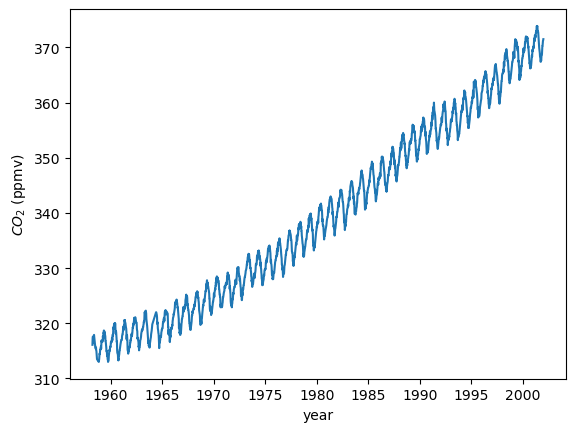

In [8]:
df = temp[['Date','CO2']]
plt.plot( df['Date'], df['CO2'])
plt.xlabel('year');
plt.ylabel('$CO_2$ (ppmv)');

Каждая точка данных соответствует измеренному уровню содержания $CO_2$ в атмосфере за месяц. Временную зависимость точек данных легко видеть на этом графике. <br>
В действительности здесь наблюдаются два тренда: сезонный (связанный с циклами роста и снижения) и глобальный, отображающий постоянный рост концентрации $CO_2$ в атмосфере.

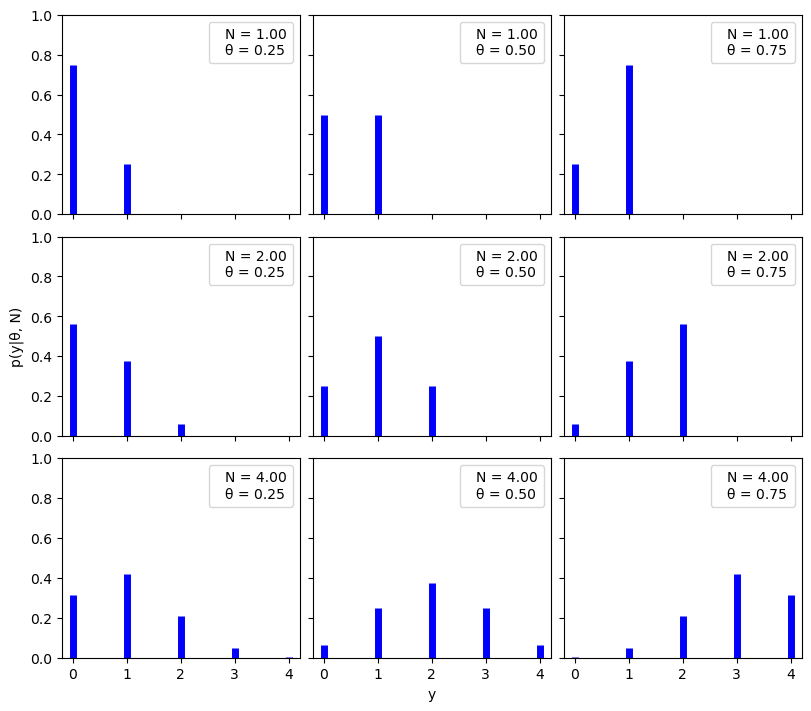

In [9]:
n_params = [1, 2, 4] # Количество испытаний (один бросок, два броска и четыре броска монеты)
p_params = [0.25, 0.5, 0.75] # Вероятность успешного результата (вероятность выпадания орла, ни как не связана с бросками)

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), 
                    sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True) 
for i in range(len(n_params)):
    for j in range(len(p_params)): 
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x) 
        ax[i,j].vlines(x, 0, y, colors='blue', lw=5, 
                       label="N = {:3.2f}\nθ = {:3.2f}".format(n,p)); 
        ax[i,j].set_ylim(0, 1);
        ax[i,j].legend(loc=1, handlelength=0) ;
ax[2,1].set_xlabel('y') ;
ax[1,0].set_ylabel('p(y|θ, N)'); 
ax[0,0].set_xticks(x);

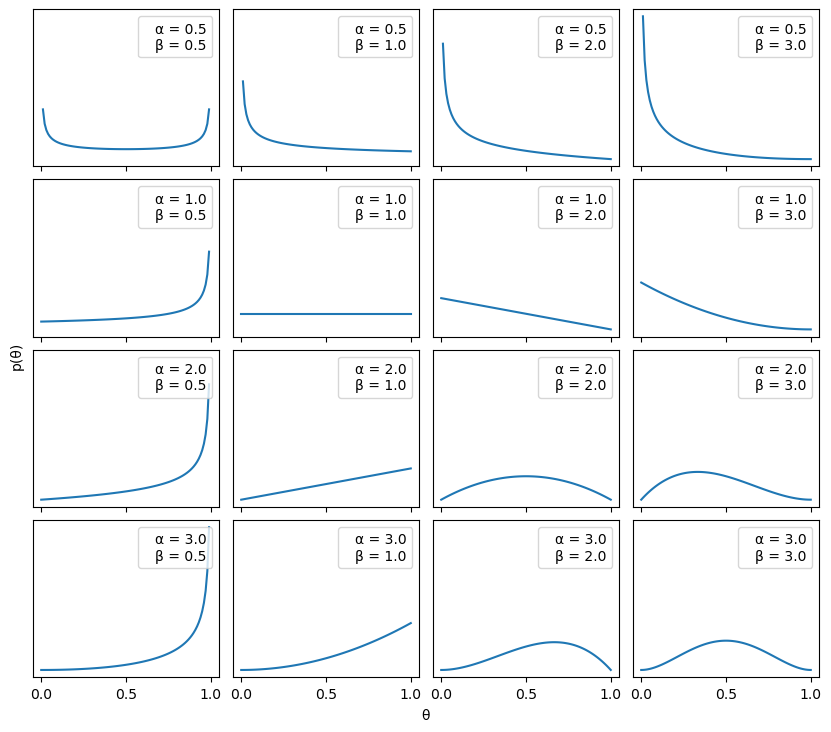

In [10]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), 
                     sharex=True,
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True
                    )
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b)) 
        ax[i,j].legend(loc=1, handlelength=0)
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.02, 'θ', ha='center');
f.text(-0.02, 0.5, 'p(θ)',va='center', rotation=90);

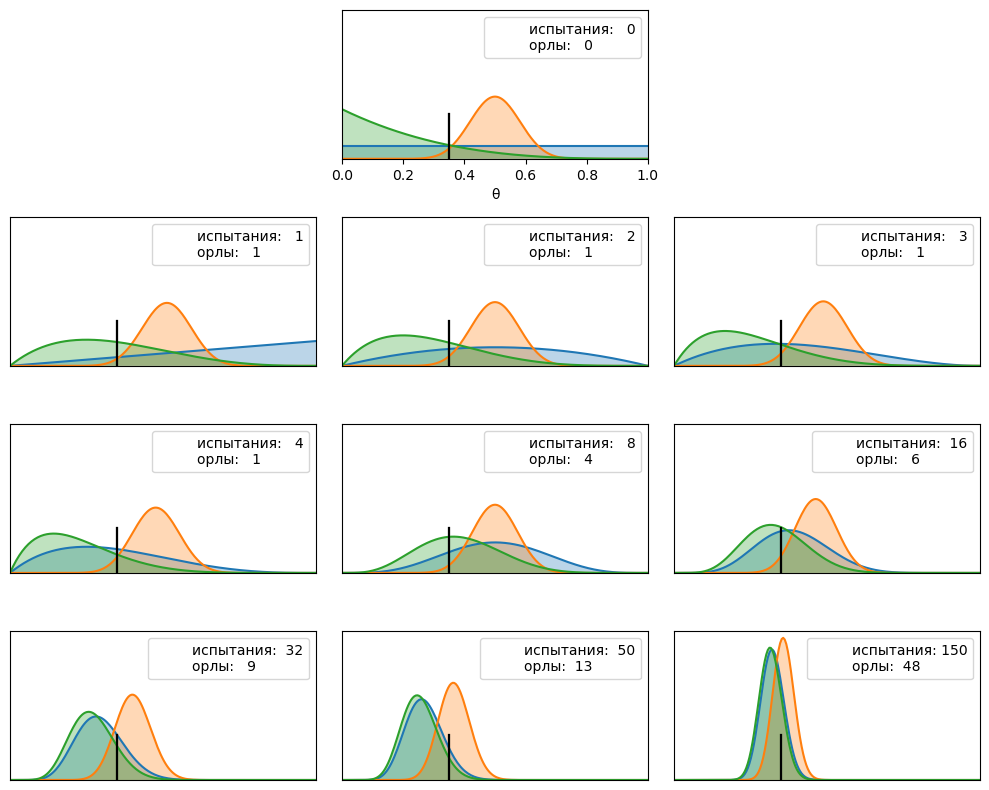

In [11]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]  # число испытаний
data =     [0, 1, 1, 1, 1, 4,  6,  9, 13,  48]  # число орлов в испытании
theta_real = 0.35 # идеальный результат (монета фальшивая :)) 

beta_params = [(1, 1), (20, 20), (1, 4)] 
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials): 
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ') 
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([]) 
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y) 
        plt.plot(x, p_theta_given_y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.3)
        plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0.5, 0, label=f'испытания:{N:4d}\nорлы:{y:4d}', alpha=0)
    plt.legend(loc=3, handlelength=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

## Задачки для разбора

### Погода в день Бородинской битвы 26 августа 1812 года.

Какое из следующих выражений соответствует предложению ***"вероятность того, что будет солнечно, учитывая, что сегодня 26 августа 1812 года?"***

- p(солнечно)
- p(солнечно | август)
- p(солнечно, 26 августа 1812 года)
- p(солнечно | 26 августа 1812 года)
- p(26 августа 1812 года | солнечно)
- p(солнечно, 26 августа 1812 года) / p(26 августа 1812 года)

### Выбор Пары Римского
Покажите, что вероятность случайного выбора человека и выбора Папы Римского не совпадает с вероятностью того, 
что папа Римский будет человеком. Возьмем население равное 7 000 000 000.

Как изменится наши вероятности ели мы живем во вселенной "Футурамы"?

<img src="data/Space_Pope.jpg" width="300">

### Задачка про фальшивую монету

Пусть у нас есть две монеты для игры в орлянку. Первая монета настояшая, а вторая специально подготовленная - фальшивая. 

Когда мы подбрасываем первую монету, в половине случаев она выпадает решкой, а в другой половине - орлом. 

Вторая монета - фальшивая, которая всегда выпадает орлом. Если мы возьмем одну из монет наугад и получим орел, какова вероятность того, что эта монета окажется фальшивой?